In [1]:
import pandas as pd

train_df = pd.read_csv('train.tsv', sep='\t')
val_df = pd.read_csv('val.tsv', sep='\t')

val_df_liar = pd.read_csv('../D2/val.tsv', sep='\t')
val_df_fnd = pd.read_csv('../D3/val.tsv', sep='\t')
val_df_fnn = pd.read_csv('../D4/val.tsv', sep='\t')
val_df_covid = pd.read_csv('../D5/val.tsv', sep='\t')

In [2]:
# no null values in dataset
train_df['title'].isnull().sum()

0

In [3]:
val_df['title'].isnull().sum()

0

In [4]:
print('Train real news:', train_df[train_df['true']==1].shape[0])
print('Train fake news:', train_df[train_df['true']==0].shape[0])

print('Val real news:', val_df[val_df['true']==1].shape[0])
print('Val fake news:', val_df[val_df['true']==0].shape[0])

Train real news: 17090
Train fake news: 18828
Val real news: 4327
Val fake news: 4653


In [5]:
#sample real news
train_df[train_df['true']==1].sample(n=1)['title'].iloc[0]

'Wild elephants trample two Rohingya refugees in Bangladesh: police'

In [6]:
#sample fake news
train_df[train_df['true']==0].sample(n=1)['title'].iloc[0]

' Trump LOSES IT, Has Complete Nervous Breakdown After His Worst Week EVER (VIDEOS)'

In [7]:
# word count in news
word_counts_train = train_df['title'].apply(lambda x: len(x.split()))
word_counts_train.describe()

count    35918.000000
mean        12.473245
std          4.128176
min          1.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title, dtype: float64

In [8]:
word_counts_val = val_df['title'].apply(lambda x: len(x.split()))
word_counts_val.describe()

count    8980.000000
mean       12.374388
std         4.043247
min         4.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        42.000000
Name: title, dtype: float64

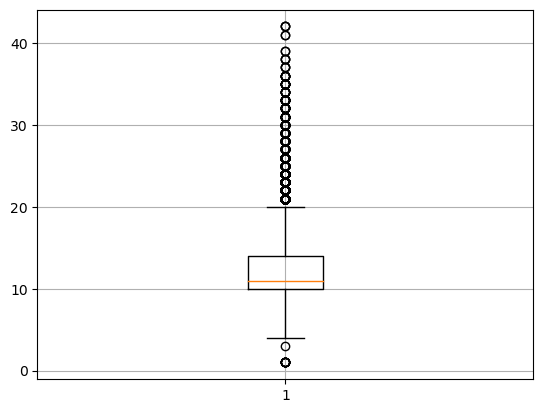

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(word_counts_train)
plt.grid(True)
plt.show()

In [10]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [12]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) # remove html tags
    review = re.sub('[^A-Za-z0-9]+', ' ', review) # taking only words
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(review)
    
    # stop word removal
    review = [word for word in tokens if word not in stop_words]
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
train_df['preprocessed_title'] = train_df['title'].apply(lambda review: data_preprocessing(review))
train_df

,title,true,preprocessed_title
0,Santorum to pull out of Republican White House...,1,santorum pull republican white house race cnn
1,Twitter BURNS Trump For Thanking White Suprem...,0,twitter burn trump thanking white supremacist ...
2,UK investigates Brexit campaign funding amid s...,1,uk investigates brexit campaign funding amid s...
3,Islamic State takes back half of Syrian town f...,1,islamic state take back half syrian town syria...
4,UNREAL! NEW YORK TIMES Blames Conservatives Fo...,0,unreal new york time blame conservative berkel...
...,...,...,...
35913,LYNCH MOB WINS By Less Than 1%…Why Republicans...,0,lynch mob win le 1 republican blame leftist do...
35914,Head of UK's anti-Brexit party appeals for hel...,1,head uk anti brexit party appeal help stop eu ...
35915,Turkey orders arrest of former police investig...,1,turkey order arrest former police investigator...
35916,CITY TO DECIDE: Should They Allow Illegals to ...,0,city decide allow illegals vote local election


In [15]:
val_df['preprocessed_title'] = val_df['title'].apply(lambda review: data_preprocessing(review))
val_df

,title,true,preprocessed_title
0,NBC REPORTER Asks Sarah Sanders About Taxes…Sh...,0,nbc reporter asks sarah sander tax point direc...
1,DEADBEATS BEWARE: Trump’s Food Stamp Reform Is...,0,deadbeat beware trump food stamp reform worst ...
2,"Netanyahu, Trump align on Iran ahead of Israel...",1,netanyahu trump align iran ahead israeli leade...
3,TRUMP SUPPORTER Whose Brutal Beating By Black ...,0,trump supporter whose brutal beating black mob...
4,Fox News FIRES Longtime Executive For Making ...,0,fox news fire longtime executive making racist...
...,...,...,...
8975,BRAINWASHED CHILDREN MOCK President Trump in D...,0,brainwashed child mock president trump disturb...
8976,U.S. 'strongly opposes' Iraqi Kurdish independ...,1,u strongly opposes iraqi kurdish independence ...
8977,GEORGE SOROS ADMITS He’s Behind Invasion Of Eu...,0,george soros admits behind invasion europe ope...
8978,Trump's threats chill corporate investment pla...,1,trump threat chill corporate investment plan m...


In [16]:
val_df_liar['preprocessed_title'] = val_df_liar['statement'].apply(lambda review: data_preprocessing(review))
val_df_fnd['preprocessed_title'] = val_df_fnd['title'].apply(lambda review: data_preprocessing(review))
val_df_fnn['preprocessed_title'] = val_df_fnn['title'].apply(lambda review: data_preprocessing(review))
val_df_covid['preprocessed_title'] = val_df_covid['title'].apply(lambda review: data_preprocessing(review))

print('ISOT length:', len(val_df))
print('LIAR length:', len(val_df_liar))
print('FakeNewsDataset length:', len(val_df_fnd))
print('FakeNewsNet length:', len(val_df_fnn))
print('Covid-19 length:', len(val_df_covid))

ISOT length: 8980
LIAR length: 1589
FakeNewsDataset length: 4048
FakeNewsNet length: 4639
Covid-19 length: 624


In [17]:
X_val_liar = val_df_liar['preprocessed_title']
y_val_liar = val_df_liar['label']

X_val_fnd = val_df_fnd['preprocessed_title']
y_val_fnd = val_df_fnd['true']

X_val_fnn = val_df_fnn['preprocessed_title']
y_val_fnn = val_df_fnn['true']

X_val_covid = val_df_covid['preprocessed_title']
y_val_covid = val_df_covid['true']

In [18]:
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['true']
y_val = val_df['true']

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_val.shape, y_val.shape)

Train data: (35918,) (35918,)
Test data: (8980,) (8980,)


In [19]:
# vectorizing text data: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_news_tfidf = vectorizer.fit_transform(X_train)
X_val_news_tfidf = vectorizer.transform(X_val)

print('X_train_new_tfidf shape:', X_train_news_tfidf.shape)
print('X_test_news_tfidf shape:', X_val_news_tfidf.shape)

X_train_new_tfidf shape: (35918, 4410)
X_test_news_tfidf shape: (8980, 4410)


In [20]:
X_val_liar_tfidf = vectorizer.transform(X_val_liar)
X_val_fnd_tfidf = vectorizer.transform(X_val_fnd)
X_val_fnn_tfidf = vectorizer.transform(X_val_fnn)
X_val_covid_tfidf = vectorizer.transform(X_val_covid)

In [21]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = MultinomialNB(alpha=1)
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val, y_pred))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.9256860204922859
LIAR: 0.4879060124395301
FakeNewsDataset: 0.3091190108191654
FakeNewsNet: 0.2491566265060241
Covid-19: 0.745005875440658


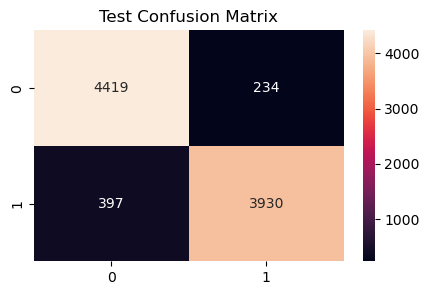

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
#print('Test Accuracy:', accuracy_score(y_val, y_pred))

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val, y_pred))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.9259860788863109
LIAR: 0.5123762376237624
FakeNewsDataset: 0.33216877183552806
FakeNewsNet: 0.36331953822696583
Covid-19: 0.5845272206303724


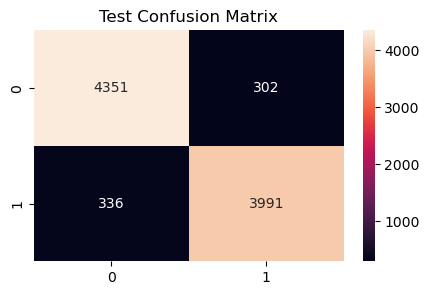

In [24]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [44]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
#print('Test Accuracy:', accuracy_score(y_val, y_pred))

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val, y_pred))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.8466270912034539
LIAR: 0.6490814884597268
FakeNewsDataset: 0.5462982493144906
FakeNewsNet: 0.8042144571885836
Covid-19: 0.7528438469493278


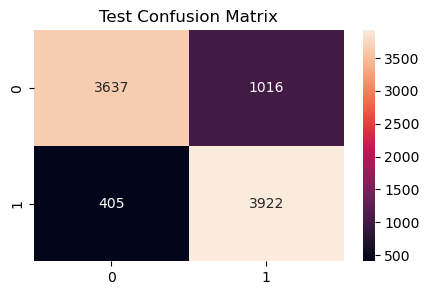

In [45]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [46]:
# analyze the AdaBoost classifier

In [47]:
clf.classes_

array([0, 1], dtype=int64)

In [48]:
clf.estimator_

DecisionTreeClassifier(max_depth=1)

In [49]:
clf.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=93762002),
 DecisionTreeClassifier(max_depth=1, random_state=1243549885),
 DecisionTreeClassifier(max_depth=1, random_state=1663499290),
 DecisionTreeClassifier(max_depth=1, random_state=473072912),
 DecisionTreeClassifier(max_depth=1, random_state=321486848),
 DecisionTreeClassifier(max_depth=1, random_state=676642306),
 DecisionTreeClassifier(max_depth=1, random_state=1684073557),
 DecisionTreeClassifier(max_depth=1, random_state=932869958),
 DecisionTreeClassifier(max_depth=1, random_state=942596799),
 DecisionTreeClassifier(max_depth=1, random_state=1938089392),
 DecisionTreeClassifier(max_depth=1, random_state=1141277876),
 DecisionTreeClassifier(max_depth=1, random_state=1378894068),
 DecisionTreeClassifier(max_depth=1, random_state=677054258),
 DecisionTreeClassifier(max_depth=1, random_state=1312159675),
 DecisionTreeClassifier(max_depth=1, random_state=720666011),
 DecisionTreeClassifier(max_depth=1, random_state=472843709),
 D

In [50]:
clf.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
clf.estimator_errors_

array([0.33963472, 0.43734212, 0.4596307 , 0.45866549, 0.4582651 ,
       0.47364656, 0.47987808, 0.48106968, 0.43852417, 0.44714603,
       0.47614715, 0.48189863, 0.48447136, 0.48373813, 0.48507866,
       0.48719036, 0.48454504, 0.48888022, 0.48435939, 0.48872009,
       0.48674093, 0.48861616, 0.48568073, 0.48948804, 0.48556922,
       0.48532355, 0.49000879, 0.48659086, 0.49070983, 0.48954453,
       0.48751225, 0.49061531, 0.49137585, 0.49163153, 0.49113193,
       0.49117043, 0.48689496, 0.49177245, 0.48774459, 0.48934856,
       0.49324573, 0.49329518, 0.4899194 , 0.49048724, 0.49312074,
       0.49331952, 0.46209111, 0.49004626, 0.49332095, 0.49333952])

In [52]:
import numpy as np

np.where(clf.estimators_[0].feature_importances_ == 1)

(array([4219], dtype=int64),)

In [53]:
clf.estimators_[0].n_features_in_

4410

In [54]:
X_train_news_tfidf

<35918x4410 sparse matrix of type '<class 'numpy.float64'>'
	with 300412 stored elements in Compressed Sparse Row format>

In [55]:
vectorizer.vocabulary_

{'santorum': 3414,
 'pull': 3086,
 'republican': 3264,
 'white': 4318,
 'house': 1911,
 'race': 3126,
 'cnn': 789,
 'twitter': 4126,
 'burn': 597,
 'trump': 4100,
 'supremacist': 3850,
 'steve': 3768,
 'bannon': 384,
 'post': 2965,
 'attacking': 323,
 'hillary': 1865,
 'clinton': 775,
 'uk': 4138,
 'investigates': 2055,
 'brexit': 554,
 'campaign': 624,
 'funding': 1640,
 'amid': 210,
 'russian': 3392,
 'meddling': 2465,
 'islamic': 2080,
 'state': 3755,
 'take': 3897,
 'back': 353,
 'half': 1782,
 'syrian': 3889,
 'town': 4039,
 'army': 283,
 'ally': 193,
 'unreal': 4175,
 'new': 2655,
 'york': 4396,
 'time': 4001,
 'blame': 484,
 'conservative': 888,
 'berkeley': 439,
 'violence': 4229,
 'watch': 4278,
 'video': 4219,
 'truth': 4104,
 'kuwait': 2214,
 'accepts': 86,
 'cabinet': 611,
 'resignation': 3278,
 'news': 2658,
 'agency': 145,
 'anti': 240,
 'safety': 3400,
 'concern': 856,
 'center': 684,
 'left': 2283,
 'party': 2834,
 'may': 2455,
 'japan': 2100,
 'snap': 3645,
 'poll': 29

In [56]:
top_words = []

for i in range(50):
    for term, idx in vectorizer.vocabulary_.items():
        if idx == np.where(clf.estimators_[i].feature_importances_ == 1)[0][0]:
            top_words.append(term)

In [57]:
X_val_fnn

0       sen gregg president obama budget proposal disa...
1       blake shelton burn luke bryan offering officia...
2       prince harry reportedly sought kate middleton ...
3       5 awkward detail blake shelton gwen stefani re...
4                     23 best moment 2018 winter olympics
                              ...                        
4634    sam hunt thanks wife bbmas speech hit award sh...
4635                  camila cabello traumatized eyeliner
4636    new couple emma watson robert pattinson seemin...
4637                                    robert kardashian
4638    brad pitt hurricane katrina home falling apart...
Name: preprocessed_title, Length: 4639, dtype: object

In [58]:
def words_in_string(word_list, a_string):
    return set(word_list).intersection(a_string.split())

In [59]:
matches = 0
for sentence in X_val_fnn:
    if len(words_in_string(top_words, sentence)) > 0:
        matches += 1
        
print(matches)

944


In [60]:
X_val_covid

0                      top guideline corona virus reddit
1                      2019 novel corona virus 2019 ncov
2                ai helping inform corona virus outbreak
3                      corona affect chicken health news
4                 dr brownstein corona virus nothing new
                             ...                        
619    two separate report confirm intel agency u bel...
620                            ready corona virus arrive
621                            manila corona virus feb 7
622    10 pulse promised covid 19 relief package dist...
623    detected person infected corona virus flying b...
Name: preprocessed_title, Length: 624, dtype: object

In [61]:
matches = 0
for sentence in X_val_covid:
    if len(words_in_string(top_words, sentence)) > 0:
        matches += 1
        
print(matches)

161


In [62]:
for word in top_words:
    print(word)

video
say
watch
hillary
obama
tweet
breaking
gop
trump
trump
house
north
america
donald
black
factbox
news
image
get
room
china
eu
senate
minister
video
muslim
detail
american
seek
talk
court
liberal
urge
racist
pm
source
clinton
south
russia
tax
myanmar
wow
one
go
uk
cop
trump
official
ex
islamic


In [63]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val, y_pred))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

Test Accuracy: 0.5798440979955457
F1 scores: 
ISOT: 0.23109843081312406
LIAR: 0.006864988558352403
FakeNewsDataset: 0.022977022977022976
FakeNewsNet: 0.018900343642611683
Covid-19: 0.06666666666666667


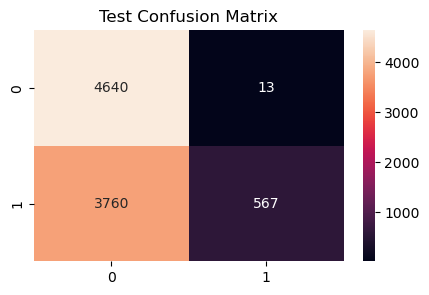

In [30]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [31]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_news_tfidf, y_train)

y_pred = xgb_model.predict(X_val_news_tfidf)
y_pred_liar = xgb_model.predict(X_val_liar_tfidf)
y_pred_fnd = xgb_model.predict(X_val_fnd_tfidf)
y_pred_fnn = xgb_model.predict(X_val_fnn_tfidf)
y_pred_covid = xgb_model.predict(X_val_covid_tfidf)

print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val, y_pred))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

Test Accuracy: 0.9070155902004454
F1 scores: 
ISOT: 0.9077653816414448
LIAR: 0.5751351351351351
FakeNewsDataset: 0.5281404772624944
FakeNewsNet: 0.7428819193525077
Covid-19: 0.7569296375266524


In [32]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val, y_pred))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

Test Accuracy: 0.9522271714922049
F1 scores: 
ISOT: 0.9506044905008636
LIAR: 0.5228267667292058
FakeNewsDataset: 0.35521028663273513
FakeNewsNet: 0.462004850444624
Covid-19: 0.7274881516587678
